In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

In [6]:
f = open('data/dqn_sree_agent1')
result = json.load(f)
min_loss = 1000
params = {}
for trial in result:
    loss = float(trial['value'])
    if loss <= min_loss:
        min_loss = loss
        params = trial['parameter']
print(params, min_loss)

{'seed': 671, 'tau': 1.9000000000000001, 'alpha': 0.314, 'gamma': 0.61} 0.6622222222222222


# DQN

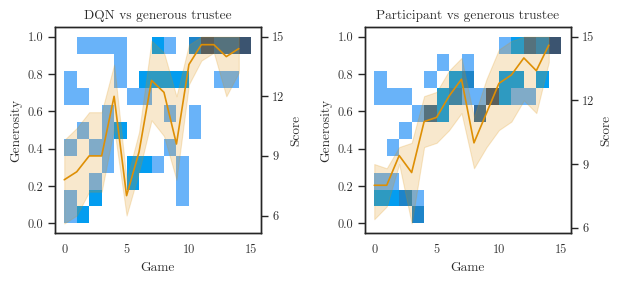

In [7]:
nAgents = 1
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=671,
        nNeurons=100,
        tau=1.9,
        alpha=0.314,
        gamma=0.61,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

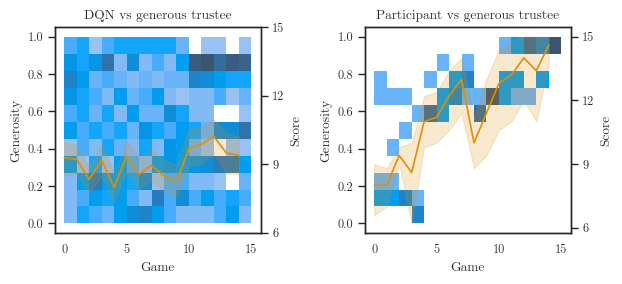

In [8]:
nAgents = 10
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=n,
        nNeurons=100,
        tau=1.9,
        alpha=0.314,
        gamma=0.61,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

proself, 3 bins

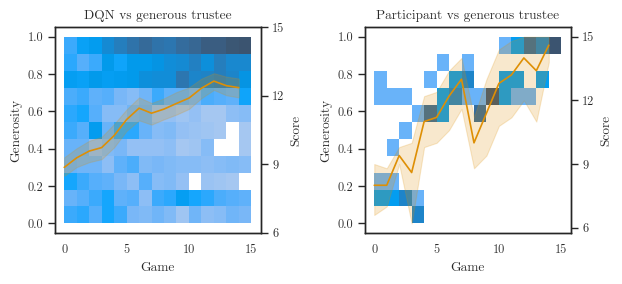

In [9]:
nAgents = 30
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=100,
        tau=3.5,
        alpha=0.047,
        gamma=0.97,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

proself, 5 bins

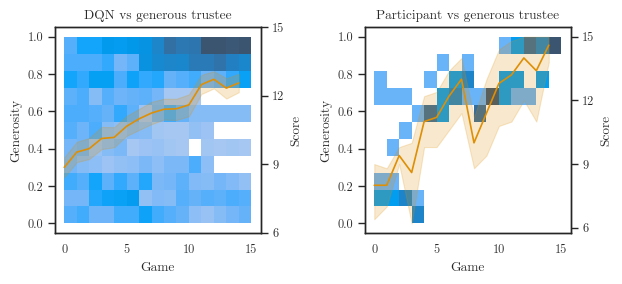

In [15]:
nAgents = 30
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=100,
        tau=6.7,
        alpha=0.047,
        gamma=0.24,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

# IBL

proself, 3 bins

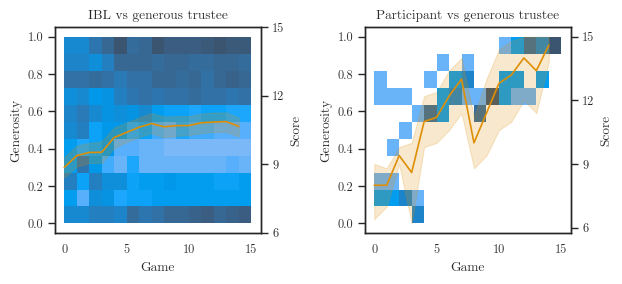

In [13]:
nAgents = 30
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
        'investor',
        ID=f"IBL{n}",
        seed=seed if nAgents==1 else n,
        thrA=-1.28,
        decay=0.9,
        sigma=0.21,
        tau=7.3,
        gamma=0.1,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'IBL vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

proself, 5 bins

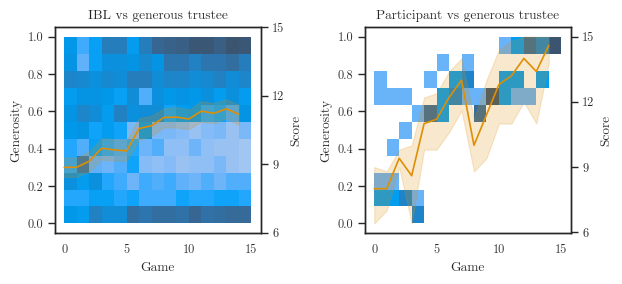

In [17]:
nAgents = 30
nGames = 15
pid = 'sree'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
        'investor',
        ID=f"IBL{n}",
        seed=seed if nAgents==1 else n,
        thrA=-0.7,
        decay=0.02,
        sigma=0.52,
        tau=4.1,
        gamma=0.02,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'IBL vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

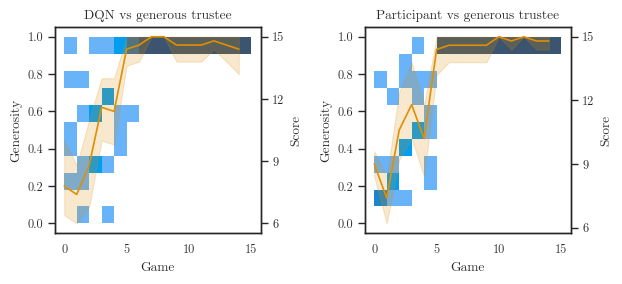

In [4]:
nAgents = 1
seed = 427
nGames = 15
pid = 'mahtabjvb'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=100,
        tau=11.2,
        alpha=0.003,
        gamma=0.98,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

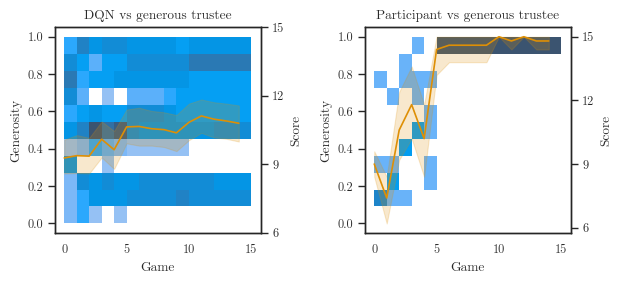

In [5]:
nAgents = 10
seed = 427
nGames = 15
pid = 'mahtabjvb'
emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=100,
        tau=11.2,
        alpha=0.003,
        gamma=0.98,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=0,
        w_i=0,
        nGames=nGames)
    )

IDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @IDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()